# Oscillatory motion



### Damped driven pendulum

Adding a **friction term** to the simple pendulum's equation of motion we get a more realistic behavior. We're not interested in the source of the friction term but how this term influences the motion of the pendulum. For **low velocities** is good to assume the **friction** to be **proportional** to the **velocity** of the pendulum. Knowing that the velocity of the pendulum is $L\frac{d\theta}{dt}$ we obtain the following equation of motion

$$\frac{d^2\theta}{dt^{2}} = - \frac{g}{L} \sin(\theta) - q\frac{d\theta}{dt} \tag{1}$$

where the minus sign comes from the fact that the friction is opposite to the motion. This friction term is commonly known as the **damping**. In order to solve this second-order differential equation, we have to convert it into two first-order differential equations, as we did for the simple pendulum


### Plot

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import solve_ivp

In [2]:
# S is defined as [omega, theta]
def dSdt(t, S, q, L = 1):
    
    g = 9.81
    
    return [-g/L * np.sin(S[1]) - q*S[0], S[0]]

In [3]:
t = np.linspace(0,20, 501) #Time
t_max = max(t)

In [4]:
#Initial conditions

w_0 = 1
theta_0 = 45 * np.pi / 180

S0 = [w_0, theta_0]

In [5]:
damping = np.array([0, 1, 5, 10]) #Distinct values of q

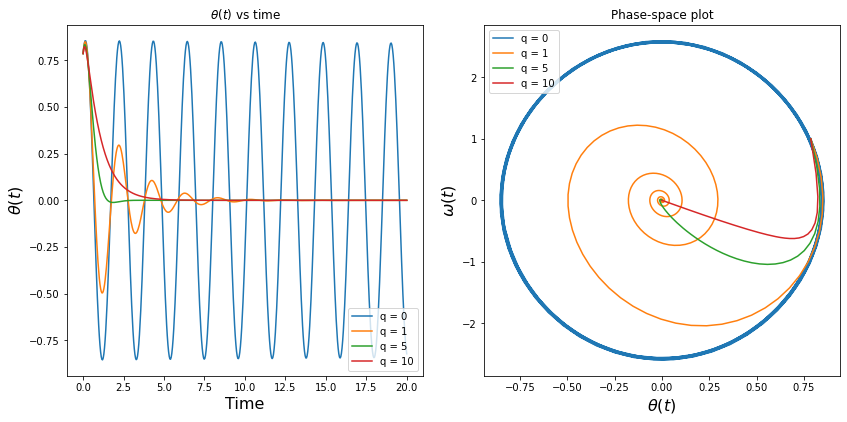

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (12,6))
fig.tight_layout(pad=3.0)

for q in damping:
    w, theta = solve_ivp(dSdt, t_span=(0, t_max), y0 = S0, t_eval = t, args = [q]).y
    
    #Theta vs time
    axes[0].plot(t, theta, label ='q = ' + str(q))
    axes[0].set_xlabel('Time', fontsize = 16)
    axes[0].set_ylabel(r'$\theta(t)$', fontsize=16)
    axes[0].set_title(r'$\theta(t)$ vs time')
    axes[0].legend()

    #Phase-space plot (omega vs theta)
    axes[1].plot(theta, w, label ='q = ' + str(q))
    axes[1].set_xlabel(r'$\theta(t)$', fontsize=16)
    axes[1].set_ylabel('$\omega(t)$', fontsize=16)
    axes[1].set_title('Phase-space plot')
    axes[1].legend()

plt.show()
    
    

When the damping force is applied, the pendulum **tends** to the **stable point** at the origin (phase-space plot), the equilibrium, as we would expect. So, let's move on something more interesting!

We're going to apply an external **driving force**, $F_{D}(t)$. This force can be whatever you want. In this notes, we'll consider a sinusoidal force of frequency $\Omega_{D}$. Hence, the equation of motion is

$$\frac{d^2\theta}{dt^{2}} = - \frac{g}{L} \sin(\theta) - q\frac{d\theta}{dt} + F_{D}\sin(\Omega_{D}t)\tag{2}$$



Actually, $F_{D}$ does not have units of force. It also depends on m and L, but it's proportional to the external driving force. We'll keep calling it as driving force for simplicity.

As we did before, we have to transform this second order DE into first order DE...

In [7]:
# S is defined as [omega, theta]
def dSdt(t, S, q, F, freq, L = 1):
    
    g = 9.8
    
    #Now, there's an explicit time dependence
    return [-g/L * np.sin(S[1]) - q*S[0] + F*np.sin(freq*t), S[0]]

In [8]:
t = np.linspace(0,60, 1501) #Time
t_max = max(t)

In [9]:
#Initial conditions
w_0 = 0
theta_0 = 30 * np.pi / 180

#Parameters
q = 0.5
F = 0.5
freq = 2/3
L = 9.8

param = [q, F, freq, L]

S0 = [w_0, theta_0]

In this case we'll use another method to solve the differential equation because it's convenient to "modify" some of the values. In fact, since $\theta$ must be in the range $[-\pi, \pi]$ we'll have to add or substract $2\pi$ when needed. So, we can use the Runge-Kutta of order 4

In [10]:
w, theta = solve_ivp(dSdt, t_span=(0, t_max), y0 = S0, t_eval = t, args = param).y

Before plotting the results we have to keep in mind that $\theta$ must be in $[-\pi, \pi]$ so, we have to "transform". Therefore, if $\theta > \pi$ we just substract $2\pi$ as many times as needed and if $\theta < -\pi$ we add $2\pi$

In [11]:
from numba import jit #To make the code faster, especially useful for large 'for' loops

@jit
def theta_to_range(theta):
    
    for i in range(len(theta)):
        
        if theta[i] > np.pi:
            while theta[i] > np.pi:
                theta[i] -= 2*np.pi
                
        elif theta[i] < - np.pi:
            while theta[i] < -np.pi:
                
                theta[i] += 2*np.pi
    
    return theta
            

In [12]:
theta = theta_to_range(theta)

### Plot

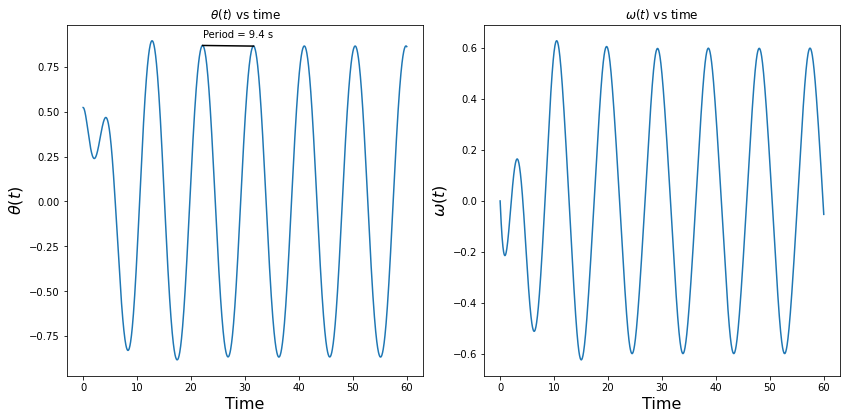

In [13]:
from scipy.signal import argrelextrema  #To find maximums of the function


fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (12,6))
fig.tight_layout(pad=3.0)

m = argrelextrema(theta, np.greater)[0]

theta_max = [theta[i] for i in m]
time_max = [t[i] for i in m]
period = time_max[4] - time_max[3]
   
#Theta vs time
axes[0].plot(t, theta)
axes[0].set_xlabel('Time', fontsize = 16)
axes[0].set_ylabel(r'$\theta(t)$', fontsize=16)
axes[0].set_title(r'$\theta(t)$ vs time')

axes[0].plot(time_max[2:4], theta_max[2:4], 'k')
axes[0].annotate(f'Period = {round(period, 3)} s',
                (time_max[2], 1.05*theta_max[2]))

#Phase-space plot (omega vs theta)
axes[1].plot(t, w)
axes[1].set_xlabel('Time', fontsize=16)
axes[1].set_ylabel(r'$\omega(t)$', fontsize=16)
axes[1].set_title(r'$\omega(t)$ vs time')

plt.show()
    

There are **two** main **regimes**. The first one (first few oscillations) caracterized by the **decay of the initial transient** as if there were not any driving force. The second one, after the transient has gone, where the motion is fully caracterized by the damping force. Indeed, the period of these oscillations is $\approx 9.4$ seconds, which is exactly what we get from $T = \frac{2\pi}{\Omega_{D}} = 9.42 $ s

We find an extremely different behaviour when we increase the driving force to $F_{D} = 1.2$. 

In [52]:
def init_cond():
    
    #Initial conditions
    w_0 = 0
    theta_0 = 30 * np.pi / 180

    #Parameters
    q = 0.5
    F = 1.2
    freq = 2/3
    L = 9.8
    
    return w_0, theta_0, q, F, freq, L

w_0, theta_0, q, F, freq, L = init_cond()

param = [q, F, freq, L]

S0 = [w_0, theta_0]

In [15]:
w, theta = solve_ivp(dSdt, t_span=(0, t_max), y0 = S0, t_eval = t, args = param).y

In [16]:
theta = theta_to_range(theta)

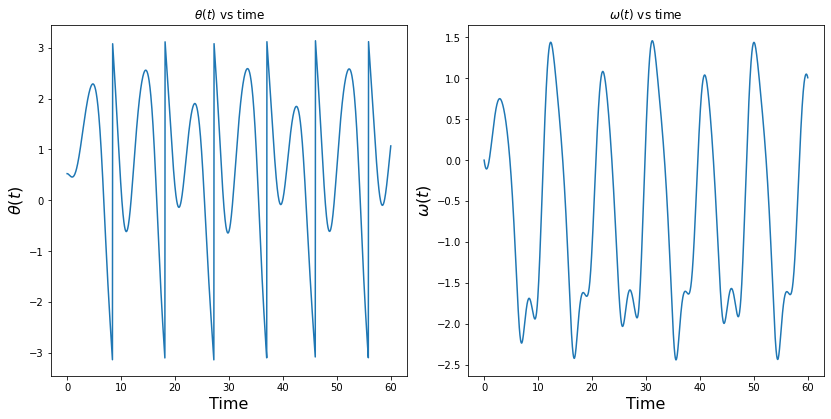

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (12,6))
fig.tight_layout(pad=3.0)
   
#Theta vs time
axes[0].plot(t, theta)
axes[0].set_xlabel('Time', fontsize = 16)
axes[0].set_ylabel(r'$\theta(t)$', fontsize=16)
axes[0].set_title(r'$\theta(t)$ vs time')

#Phase-space plot (omega vs theta)
axes[1].plot(t, w)
axes[1].set_xlabel('Time', fontsize=16)
axes[1].set_ylabel(r'$\omega(t)$', fontsize=16)
axes[1].set_title(r'$\omega(t)$ vs time')

plt.show()

Now, we do **not** find any behavior **repeating in time**. Instead, we have a **chaotic** behavior. On the other hand, keep in mind that the jumps in $\theta(t)$ are not discontinuities, but our "transformation" of the angle whenever it goes out of the range $[-\pi, \pi]$

### Chaos

Let's back up to the **chaotic behavior**. Chaos has nothing to do with non deterministic behavior. Indeed, the solution of $\theta(t)$ (and $\omega(t)$) is completely deterministic once we've set the initial conditions. So, chaos is about a **dynamical system highly sensitive** to **initial conditions** and whose trajectories appears to be random.

Let's consider to identical pendulums, with exactly the same length, driving force, damping factor, etc. However, we change slightly their initial conditions. We'll see how the difference between their angular positions, $\Delta\theta$ evolves with time. 

In [53]:
t = np.linspace(0,200, 5000) #Time
t_max = max(t)

In [54]:
#Initial conditions
w_0, theta_0, q, F, freq, L = init_cond()
theta_1 = 1.01*theta_0

param = [q, F, freq, L]

S0 = [w_0, theta_0]
S1 = [w_0, theta_1]

In [55]:
w, theta = solve_ivp(dSdt, t_span=(0, t_max), y0 = S0, t_eval = t, args = param).y
w1, theta1 = solve_ivp(dSdt, t_span=(0, t_max), y0 = S1, t_eval = t, args = param).y

In [56]:
delta = np.abs(theta - theta1)

Text(0.5, 1.0, '$\\Delta\\theta(t)$ vs time')

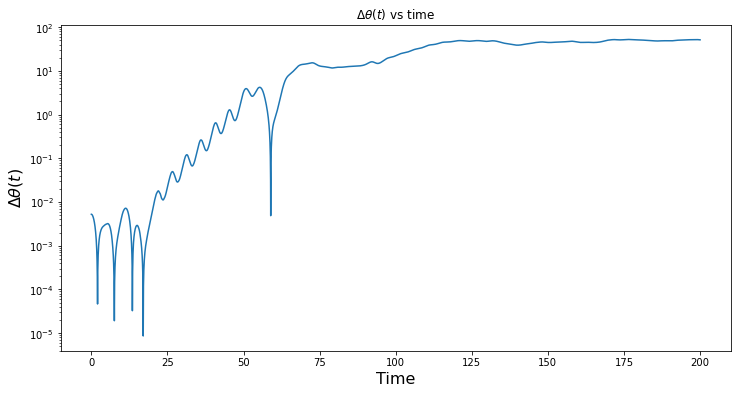

In [57]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (12,6))
   
#Theta vs time
axes.plot(t, delta)
axes.set_xlabel('Time', fontsize = 16)
axes.set_ylabel(r'$\Delta\theta(t)$', fontsize=16)
axes.set_yscale('log')

axes.set_title(r'$\Delta\theta(t)$ vs time')

We see that between 20 and 80 s (approx) the difference of the angular positions presents an **exponential growth** (linear in logarithmic scale). This is related with the **Lyapunov exponent**, which is a "measure" of how chaotic a dynamical system is. 

Let us explore the phase-space plot ($\omega$ vs $\theta$) of this type of pendulum. We'll plot as well the **Poincaré section**. That is, the points that are in phase with the driving force.

So, we have to display all the points which fulfill $\Omega_{D}t = 2\pi n $, where $n$ is an integer. Since we work with discrete time, we need the points in which 

$$ |t - \frac{2n\pi}{\Omega_{D}}| < \frac{\Delta t}{2} \tag{3}$$

being $\Delta t$ the step between two consecutive times. 



In [61]:
import math
from numba import jit

def poincare_section():

    #We need a very large value of time in order to appreciate the Poincaré Section clearer.
    #So, we recalculate theta, omega ONLY to plot the Poincaré section
    
    t_p = np.linspace(0,5000, 125000) #
    t_max = max(t_p)
    
    #Init conditions
    w_0, theta_0, q, F, freq, L = init_cond()
    param = [q, F, freq, L]
    S0 = [w_0, theta_0]
    
    #Solving equations
    omega1, theta1 = solve_ivp(dSdt, t_span=(0, t_max), y0 = S0, t_eval = t_p, args = param).y
    theta1 = theta_to_range(theta1)
    
    #Poincaré section
    
    
    @jit
    def poincare_loop():
    
        theta_p = np.zeros(0)
        w_p = np.zeros(0)

        delta_t = max(t_p) / len(t_p)

        for i in range(len(t_p)):

            #Working out the inequality [3] we find that m (integer) must be between these two bounds
            upper_bound = math.ceil(freq*(t_p[i] + 0.5*delta_t)/(2*np.pi))
            lower_bound = math.floor(freq*(t_p[i] - 0.5*delta_t)/(2*np.pi))

            for m in range(lower_bound, upper_bound):

                if np.abs(t_p[i] - 2*np.pi*m/freq) < delta_t/2:


                    theta_p = np.append(theta_p, theta1[i])
                    w_p = np.append(w_p, omega1[i])

        return theta_p, w_p
    
    theta_p, w_p = poincare_loop()  
    
    return theta_p, w_p

In [62]:
theta_poincare, omega_poincare = poincare_section()

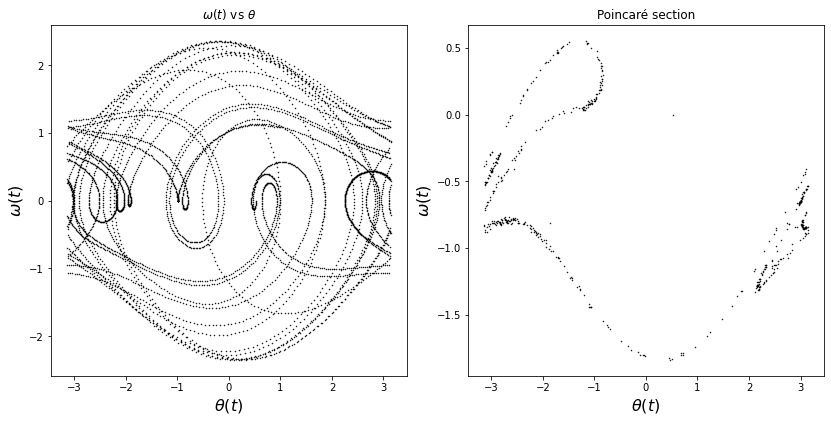

In [63]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (12,6))
fig.tight_layout(pad=3.0)

#Phase-space plot (omega vs theta)
theta = theta_to_range(theta)

axes[0].plot(theta, w, 'ko', markersize = 0.5, label = 'F = ' + str(F))
axes[0].set_xlabel(r'$\theta(t)$', fontsize = 16)
axes[0].set_ylabel('$\omega(t)$', fontsize=16)
axes[0].set_title(r'$\omega(t)$ vs $\theta$')

#Poincaré section
axes[1].plot(theta_poincare, omega_poincare, 'ko', markersize = 0.5)
axes[1].set_xlabel(r'$\theta(t)$', fontsize=16)
axes[1].set_ylabel('$\omega(t)$', fontsize=16)
axes[1].set_title('Poincaré section')

plt.show()

So, the graph on the right (Poincare section) is how we would see the first graph (phase-space) if we only observed the system at a specific rate (driving force frequency). This may appear pretty useless but in some cases we are restricted by the measuring intrument and one can only measure at some specific rate (e.g video camera). 